In [1]:
import numpy as np

import artm
from artm import hARTM

import sys
sys.path.append('utils/')
# you need sklearn for simple loading
from sklearn.datasets import fetch_20newsgroups

import glob 
import os

In [2]:
hier = hARTM()

In [3]:
regularizers_list = []

regularizers_list.append(artm.SmoothSparsePhiRegularizer(name='SPPhiCatReg',class_ids=['text'],tau=0.05))
regularizers_list.append(artm.SmoothSparsePhiRegularizer(name='SPPhiAuthorReg',class_ids=['text'],tau=0.05))
regularizers_list.append(artm.SmoothSparsePhiRegularizer(name='SPPhiTagReg',class_ids=['text'],tau=0.05))
regularizers_list.append(artm.DecorrelatorPhiRegularizer(name='DecorrPhiReg',class_ids=['text'],tau=50000))

regularizers_list.append(artm.SmoothSparsePhiRegularizer(name='SPPhiNgrammRegSubj',
                                                         class_ids=['text'],
                                                         #topic_names=topics_subj,
                                                         tau=0.01))
regularizers_list.append(artm.SmoothSparseThetaRegularizer(name='SmoothThetaRegSubj',
                                                           #topic_names=topics_subj,
                                                           tau=0.01))

In [4]:
# quality measures of models
scores_list = []
scores_list.append(artm.SparsityPhiScore(name='SparsityScoreNgrammSubj',
                                         class_id='text',
                                         #topic_names=topics_subj
                                        ))
scores_list.append(artm.SparsityThetaScore(name='SparsityScoreThetaSubj',
                                           #topic_names=topics_subj
                                          ))

scores_list.append(artm.SparsityPhiScore(name='SparsityScoreCat', class_id='text'))
scores_list.append(artm.SparsityPhiScore(name='SparsityScoreAuthor', class_id='text'))
scores_list.append(artm.SparsityPhiScore(name='SparsityScoreTag', class_id='text'))
scores_list.append(artm.TopTokensScore(name='TopTokensScoreNgramm', class_id='text', num_tokens=800))
scores_list.append(artm.TopTokensScore(name='TopTokensTag', class_id='text', num_tokens=800))
scores_list.append(artm.TopicKernelScore(name='TopicKernelNgramm', class_id='text', probability_mass_threshold=0.25))
scores_list.append(artm.PerplexityScore(name='PerplexityScore', class_ids=['text']))


In [44]:
data_path = 'data/lang_data.vw'
batches_path = 'data/batches'

In [45]:
if len(glob.glob(os.path.join(batches_path + '*.batch'))) < 1:
    batch_vectorizer = artm.BatchVectorizer(data_path=data_path, data_format='vowpal_wabbit',
                                            target_folder=batches_path)
else:
    batch_vectorizer = artm.BatchVectorizer(data_path=batches_path, data_format='batches')

InternalError: boost::filesystem::filesystem_error
std::exception::what: boost::filesystem::create_directory: Not a directory: "model_6_80/example.vw/urnuuidb47b2912-9ad2-11e9-b1fd-e4b318cc123f"

In [7]:
dictionary = artm.Dictionary('dictionary')
dictionary.gather(batches_path)
dictionary.filter(min_df=1000, max_tf=17390)

artm.Dictionary(name=dictionary, num_entries=8289)

In [37]:
dictionary.save("dict")

In [8]:
topicNum0 = 6
level0 = hier.add_level(num_topics=topicNum0)

for reg in regularizers_list:
    level0.regularizers.add(reg)
for score in scores_list:
    level0.scores.add(score)

In [9]:
level0.initialize(dictionary=dictionary)
level0.fit_offline(batch_vectorizer, num_collection_passes=30)

In [10]:
for topic_name in level0.topic_names:
    print (topic_name + ': ')
    print (", ".join(level0.score_tracker['TopTokensTag'].last_tokens[topic_name]))

topic_0: 
query), slave->mtd, item, query, -1,, tag, mtd_part, x, join, mtd_info, null, note, opcode, author, (char, cls, ], [, q, *part, number, part(mtd);, lambda, -1}, ->, ordering, size_t, *mtd,, #if, []), partition, len,, ##, 2), program, loff_t, printf, assertequal(, models, (0x0000), which, all(), mtd, event, w, count(),, but, some, report, size, reserved, output, {0,, len), fields, test, order, datetime, from,, identifier, used, --, u64, shared, --------------------------------------------, x), part->offset,, 9,, cpu, related, model, @classmethod, while, do, error, (c), register, [], more, list, out, [0x0000], 11,, slave->offset, create(), need, doesn't, {2,, base, write, filter, a1, flags, volatile, left, ret;, 15,, (unsigned, queries, len);, ssize_t, part->offset;, only, django, c1, when, it's, &=, 13,, one, uchar, sure, after, *), two, field, object, ',, erase, device, __init, make, uint64_t, bits, offset, values(), sql, under, 3, column, default, different, part, same, get,

err;, (struct, err, u32, (1, control, sctp_packet, ret;, u8, sctp_chunk, sctp_xmit_t, val, __func__,, retval, reg, null,, switch, chunks, %d\n",, sizeof(struct, retval;, auth, -enomem;, *packet,, *), get, sender, sctp_xmit_ok;, rwnd, sctp, %s, pr_debug("%s, ?, has, null), transport, default, size_t, 6, do, bytes, packet,, continue;, when, (ret), chunk);, sk_buff, one, %d, more, check, >>, len, address, gfp_kernel);, been, 0),, header, &=, (err, u16, driver, i;, (ret, (c), device, name,, error, buffer, length, status;, 1);, after, at, id, sack, unit, failed, __func__);, while, later, i,, snd_kcontrol_new, pr_err("%s, integer, bit, 8), timer, given, (retval, only, register, "%s, %s\n",, bundle, sctp_association, sctp_xmit_ok), *chunk), 3, net_device, status, out;, skb, audio, firmware, try, snd_kcontrol, ip, /, 4, *dev,, val);, 2), (val, val;, out, dotdot%p\n",, *asoc, bundling, *chunk,, asoc->peer, name);, clock, key, mixer, -eio;, adding, printk(kern_err, rc;, dotdot%p, kernel, level, 

);, std, false;, size, true;, list, none, ?, <=, #ifdef, (, path, /, %, result, error, number, at, under, >>, but, while, x, request, may, test, which, used, mode, e, stack, (unsigned, c, ', add, check, only, page, one, when, ,, block, n, #if, first, address, do, -1;, get, memory, end, status, os, b, -=, **, try, out, returns, has, object, default, string, raise, into, id, current, qstring, uint32, copy, *), using, continue;, table, f, (c), create, true, flags, code, j, #else, then, s, user, distributed, uint64_t, was, start, /**, does, except, false, float, values, ++i), 3, delete, same, null), more, double, index, 1);, (int, __init, obj, python, {}, up, there, write, node, point, p, index,, output, inode, source, np, ;, %d, http, dotdot//www, implied, each, i;, i,, other, either, pointer, line, key, ");, don't, input, given, tensorflow, need, index), after, terms, already, dotdotstring, 2,, args, v, time, ->, your, here, called, make, find, element, some, if(, group, 4, event, db, sw

In [11]:
level1 = hier.add_level(num_topics=80, topic_names=['child_topic_' + str(i) for i in range(80)], 
                        parent_level_weight=1)
for reg in regularizers_list:
    level1.regularizers.add(reg)
for score in scores_list:
    level1.scores.add(score)

In [12]:
level1.initialize(dictionary=dictionary)
level1.fit_offline(batch_vectorizer, num_collection_passes=30)

In [13]:
len(level1.get_psi())

80

In [14]:
psi = level1.get_psi()

In [15]:
print ("Psi support:", psi.values.max(axis=1).min())

Psi support: 0.00023279482


In [16]:
psi_threshold = 0.01
parent_counts = np.zeros(0)
for level_idx in range(1, hier.num_levels):
    psi = hier.get_level(level_idx).get_psi().values
    parent_counts = np.hstack((parent_counts, (psi > psi_threshold).sum(axis=1)))
print ("Mean parents count:", parent_counts.mean())


Mean parents count: 0.875


In [17]:
batch = artm.messages.Batch()
batch_name = 'phi1.batch'

with open(batch_name, "rb") as f:
    batch.ParseFromString(f.read())
    
Ntw = np.zeros(len(level0.topic_names))
    
for i,item in enumerate(batch.item):
    for (token_id, token_weight) in zip(item.field[0].token_id, item.field[0].token_weight):
        Ntw[i] += token_weight

Nt1t0 = np.array(psi) * Ntw
psi_bayes = (Nt1t0 / Nt1t0.sum(axis=1)[:, np.newaxis]).T

In [18]:
indexes_child = np.argmax(psi_bayes, axis=0)

In [19]:
topic_parent_name = 'topic_1'
print(topic_parent_name + ':')
print(" ".join(level0.score_tracker['TopTokensTag'].last_tokens[topic_parent_name]))
print('')
i=9
for child in np.where(indexes_child == i)[0]:
    print('    ' + level1.topic_names[child] + ': ')
    print(" ".join(level1.score_tracker['TopTokensTag'].last_tokens[level1.topic_names[child]]))
    print('')

topic_1:
null); job jobs kbasep_js_device_data caller js_devdata mali_bool &kbdev->js_data; *kbdev, *js_devdata; run ctx runpool kbase_context flags); address kbase_debug_assert(kbdev state lock, flags out kctx); kctx, js, space contexts jsctx_mutex); hold kbasep_js_kctx_info cores mali_false) next scheduled *** affinity do null, irq has try kbase_debug_print_info(kbase_jm, kbase_debug_assert(kctx /** when was note (u32) check sched_info; spin_unlock_irqrestore(&js_devdata->runpool_irq only flags; *kctx) *js_kctx_info; kbase_jd_atom js_kctx_info lock platform_device because before null) submitting after there more running virtual sched_info &kctx->jctx js_kctx_info->ctx mali_false; spin_lock_irqsave(&js_devdata->runpool_irq priority dev submit resource then at refcount mutex_unlock(&js_devdata->runpool_mutex); katom, is_scheduled (katom->core_req mali_false); platform_data id length need pfn up mt_device, locking atom policy slot jsctx_mutex kbdev->config_attributes, kbasep_get_config_

In [21]:
psi1 = level1.get_psi()
psi1

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
child_topic_0,1.637117e-08,1.363367e-08,2.622686e-08,2.287693e-08,1.924079e-08,1.558041e-01
child_topic_1,5.715487e-05,4.402154e-08,7.213939e-07,2.954957e-08,1.646572e-02,1.817536e-08
child_topic_2,2.531758e-08,1.372266e-08,9.999296e-08,1.784473e-01,1.346482e-07,1.618059e-08
child_topic_3,1.333765e-04,3.067963e-06,1.009449e-04,7.391079e-08,3.903682e-02,1.800067e-08
child_topic_4,2.871040e-06,2.511978e-08,2.329927e-07,3.456786e-08,2.995874e-02,1.612921e-08
child_topic_5,5.355946e-05,2.344544e-07,1.128150e-04,4.624405e-08,3.451726e-02,1.817379e-08
child_topic_6,1.523170e-08,1.355945e-08,1.095497e-07,2.293614e-08,9.417382e-09,3.058640e-01
child_topic_7,2.316670e-05,7.417557e-07,2.536959e-03,3.987435e-07,6.091151e-04,2.777163e-06
child_topic_8,4.605091e-02,1.189645e-07,8.809851e-06,2.863274e-08,2.222970e-05,1.978266e-06
child_topic_9,1.211092e-04,6.125841e-08,1.068944e-04,2.844101e-08,1.088908e-02,8.231009e-08


In [22]:
tokens0 = level0.score_tracker["TopTokensTag"].last_tokens
tokens1 = level1.score_tracker["TopTokensTag"].last_tokens
for t, topic_name in enumerate(level0.topic_names):
    print (topic_name + ': ')
    for word in tokens0[topic_name]:
        print (word, end=' ')
    print()
    for s, topic_name1 in enumerate(level1.topic_names):
        if psi1[topic_name ][ topic_name1 ] > 0.05:
            print ("\t", topic_name1 + ': ')
            for word in tokens1[topic_name1]:    
                print (word, end=' ')
            print()
    print("=="*30)

topic_0: 
query) slave->mtd item query -1, tag mtd_part x join mtd_info null note opcode author (char cls ] [ q *part number part(mtd); lambda -1} -> ordering size_t *mtd, #if []) partition len, ## 2) program loff_t printf assertequal( models (0x0000) which all() mtd event w count(), but some report size reserved output {0, len) fields test order datetime from, identifier used -- u64 shared -------------------------------------------- x) part->offset, 9, cpu related model @classmethod while do error (c) register [] more list out [0x0000] 11, slave->offset create() need doesn't {2, base write filter a1 flags volatile left ret; 15, (unsigned queries len); ssize_t part->offset; only django c1 when it's &= 13, one uchar sure after *) two field object ', erase device __init make uint64_t bits offset values() sql under 3 column default different part same get o 12, id) , spi even partitions \"%s\" details spi_xfer has mtd->ecc_stats *retlen, retlen, testing ^ distributed and/or don't may res

slave->mtd mtd_part mtd_info *part part(mtd); *mtd, size_t partition len, loff_t mtd size from, part->offset, slave->offset part->offset; len) uint64_t erase len); ret; offset partitions \"%s\" mtd->ecc_stats *retlen, retlen, res; part (unsigned *buf) buf); u_char erasesize mutex_unlock(&mtd_partitions_mutex); list) flags end *master, -= ofs master) which master->size mtd_part_parser *mtd) mutex_lock(&mtd_partitions_mutex); mtd->size) (slave->offset device offset; do master found to, slave -- doesn't printk(kern_notice &mtd_partitions, mtd_partition regions[i] object list res offset, stats start *p) (ret while max register © given boundary pages i, structure size; parsers o offs ofs, cur_offset; printk(kern_warning"mtd spin_unlock(&part_parser_lock); (slave->mtd @types part->name); spin_lock(&part_parser_lock); master->name); instr->addr slave->offset; <= program *buf, count, length; buf, *p, parser (length preserve len *ops) ret, &= pointer end; err let's next, name; ops); \"%s\"\n", 

-> (0x0000) printf output -------------------------------------------- [0x0000] reserved volatile ssize_t uchar *) spi base spi_xfer transmit (uchar qsmcm->qsmcm_tranram[i++] gpio transfer register after 0xff); write debug *addr, *buffer, len) i; *, (c) out 15] (immap_t immap_t i=0; controll alen, spi_write *)&immr->im_qsmcm; peri immr (qsmcm5xx_t memdump *immr; qsmcm qsmcm5xx_t *qsmcm; config_sys_immr; read dump **************************************************************************** /**************************************************************************** ((void 2001 time array before txbuf 32); memory for(i=0;i<32;i++) qsmcm->qsmcm_recram[i]=0x0000; dprint (("*** qsmcm->qsmcm_tranram[i]=0x0000; spi_init_r spi_read quickhex qsmcm->qsmcm_comdram[i]=0x00; xfer\n"); (void) de> received program and/or irq connected wrap 2, ("\n"); start len; 1000) do disabled 3); flags enabled num; used while *********************************************************************** int, delay cs pe

query) item query tag x join author note cls lambda number q []) ordering assertequal( 2) all() count(), w report order test identifier datetime x) related @classmethod [] models create() fields filter a1 c1 model queries error left ', some when field values() django 12, id) sql program testing make empty using different save() two sure % only values create default one 3 results channel [self used id, doesn't which (self false) six there connection but 3) items o shouldn't where object tables has check db page works 1), t1 reverse tests across it's once status also multiple possible slice work identity) then was "cannot nested node none() more filters exclude result delete() ", parent 4) count out db) match name, strip after don't none been same isn't too lookup second 0), individual ( c does select id do meta issues here d refs 4 -- self, generic need true) incorrect r first still because extra tags passed above raise t even true null r1 pos now while detail being combine columns cach

try jobs *js_devdata; null); address kbasep_js_device_data &kbdev->js_data; job runpool then state *kbdev, do flags js_devdata contexts kbasep_js_kctx_info jsctx_mutex); does /** kctx); at sched_info; js, none retry ctx flags; cores other note kctx, whilst released space kbase_debug_print_info(kbase_jm, up may stop just context, lock, has conditions call slot otherwise (katom->core_req kbasep_get_config_value(kbdev, there's being need &kctx->jctx already don't after but keep locking transition running failed ready break retain result nr_jobs kbase_context kbase_jd_atom ( run null, jsctx_mutex mali_bool mali_false); higher when katom->jc, mutex_lock(&js_devdata->runpool_mutex); full lower recently_chosen_affinity); made scheduling mutex_unlock(&js_devdata->runpool_mutex); sched_info priority been js due disabled change *kbdev) longer dotdotrunpool_mutex katom); 0u; get track reference scheduled js_kctx_info->ctx drop now since mali_false katom, mali_true; still >> policy, some runpool_i

flags platform_device virtual dev platform_data id mt_device, pfn length io [2] ucon resource [1] ufcon ulcon [0] uartclk irq iotype upio_mem, __initdata mapbase sz_1m, regshift vr1000_baudbase, upf_ioremap, upf_boot_autoconf vr1000_irq_serial (__phys_to_pfn((item) define_res_mem(s3c2410_cs5 long)(item) ((unsigned 2, devices gpio ulcon, ucon, simtec co ufcon, __init "", vr1000_pa_dm9000 "s3c24xx_led", s3c24xx_led_platdata def_trigger hwport num_resources 4), ioresource_irq ben board 3, <ben@simtec dooks macros space sz_16m, 0x40), uk> &vr1000_dm9k_platdata, thorcom "dm9000", vr1000 ioresource_irq_highlevel), modify null, [3] s3c2410_uartcfg port <linux/tty serial <asm/mach/irq ourselves <asm/irq <linux/io <linux/serial interrupt better map_desc electronics isa 0x68), s3c2410_lcon_pnone uk/ s3c2410_lcon_cs8 2003-2008 <linux/serial_s3c i2c_board_info support <mach/hardware "common physical <linux/kernel addresses machine tested i2c off")); limit routines <linux/gpio controls <linux/init 

job jobs *js_devdata; run *kbdev, js_devdata &kbdev->js_data; caller runpool mali_bool kbasep_js_kctx_info kbase_debug_assert(kbdev js, jsctx_mutex); *** kbasep_js_device_data null); out hold mali_false) address might mutex_unlock(&js_devdata->runpool_mutex); affinity has kbase_context &kctx->jctx (u32) lock more spin_unlock_irqrestore(&js_devdata->runpool_irq kctx, kbase_debug_assert(kctx js_kctx_info *js_kctx_info; priority null, slot up scheduled js_kctx_info->ctx space there allow submitted next is_scheduled when refcount /** lock, kbasep_js_atom_retained_state kctx); ctx jsctx_mutex kbdev->config_attributes, retained mali_false; null) where "js *kctx) queue kbase_debug_assert(katom->affinity runpool_irq running katom, katom->jc, (katom->core_req other sched_info; release flags); submit stop #if policy was mutex_unlock(&js_kctx_info->ctx &js_devdata->runpool_irq katom->coreref_state transaction evict retain could kbase_jd_atom kbasep_js_policy into spaces whether being we've regist

null); job jobs kbase_context run &kbdev->js_data; lock, state runpool kbasep_js_device_data caller contexts hold next kbase_debug_assert(kbdev address flags); out do mali_bool scheduled spin_unlock_irqrestore(&js_devdata->runpool_irq kctx); only /** kctx, js, kbase_debug_print_info(kbase_jm, spin_lock_irqsave(&js_devdata->runpool_irq before mali_false) js_devdata need null, submitting was kbasep_js_atom_retained_state nr_jobs space flags; jsctx_mutex); js_kctx_info->ctx dotdot%u", mali_false; cores js_kctx_info atom mali_true; there transition affinity note lock &kbdev->js_data locking sched_info kbdev->config_attributes, kbase_debug_assert(js_kctx_info->ctx mali_false); katom, kbasep_js_policy kbase_debug_assert(katom->affinity start (u32) inline base_jd_req_t, jsctx_mutex mutex_lock(&js_devdata->runpool_mutex); release_result kbasep_js_per_as_data dotdotrunpool_mutex priority higher has *kctx, registers currently get *kbdev) *kctx) transaction (js_kctx_info->ctx when could made kato

*js_devdata; job mali_bool caller &kbdev->js_data; kbasep_js_device_data flags); *kbdev, cores next js, kbase_context run state js_devdata *kctx) affinity kbase_debug_assert(kbdev js_kctx_info (u32) ctx kbase_debug_assert(kctx sched_info; scheduled irq kbasep_get_config_value(kbdev, release kbase_jd_atom submitting policy *js_kctx_info; release_result katom->coreref_state break runpool kctx); core_req hold \a mutex_lock(&js_devdata->runpool_mutex); sched_info kbdev->config_attributes, &js_devdata->runpool_irq (katom->core_req is_scheduled previous contexts kctx, requeue refcount mali_false; *kctx, retained *** mutex_unlock(&js_kctx_info->ctx running also kbase_debug_print_info(kbase_jm, mali_true; mali_false); then kctx evict need might *kbdev) following scheduling js_policy after locking lock); ready submitted try note only check transition katom->affinity); mali_false base_jd_req_t, space transaction being otherwise was cores_ready; requirements since lock policy; kbase_trace_add_slo

job null); flags); js_devdata *kbdev, state check kbase_debug_assert(kbdev address mali_bool caller kctx, scheduled after out null) jsctx_mutex); mali_false) try before sched_info; affinity when more contexts submit kctx); *** need because following ctx irq kbasep_js_kctx_info (u32) spin_lock_irqsave(&js_devdata->runpool_irq null, atom other kbasep_js_device_data kbase_debug_assert(kctx was has slot kbase_jd_atom katom, flags; note keep lock &kbdev->js_data; don't retry lower spin_unlock_irqrestore(&js_devdata->runpool_irq *kctx) is_scheduled next *js_kctx_info; retain transition js_kctx_info->ctx submitting enabled there private >> katom); allow due katom->coreref_state dotdot%u", currently #if same at recently_chosen_affinity); sched_info kbasep_get_config_value(kbdev, running submitted registers pool hold until call failed hw locking dotdotrunpool_mutex spaces &kbdev->js_data kbdev->config_attributes, ensure nr_jobs schedule later while inline js, enum *js_devdata; higher previous f

kbasep_js_device_data jobs kbase_context kbase_debug_assert(kbdev null); cores run jsctx_mutex); *kbdev, hold contexts /** js_devdata flags); caller flags js_per_as_data out submission kbase_debug_assert(kctx kbasep_js_kctx_info do kctx, *** space sched_info spin_lock_irqsave(&js_devdata->runpool_irq affinity when at address lock, kctx); kbase_debug_print_info(kbase_jm, *js_devdata; &kbdev->js_data; kbase_jd_atom transaction ctx mali_false); policy before mali_bool #ifdef there schedule &kctx->jctx has than after scheduling kbasep_js_per_as_data change more mali_false) kbasep_get_config_value(kbdev, submit g previous mali_false; because is_scheduled release flags; but js, runpool was next (katom->core_req kbase_debug_assert(js_kctx_info->ctx note time kbase_debug_assert(katom->affinity katom->affinity); priority check then "js one try break don't made whilst kctx may policy; *kctx, runpool_irq (js_kctx_info->ctx *kbdev) atom); (cores_ready katom->core_req atom null submitting kbasep_js

err; (struct err u32 (1 control sctp_packet ret; u8 sctp_chunk sctp_xmit_t val __func__, retval reg null, switch chunks %d\n", sizeof(struct retval; auth -enomem; *packet, *) get sender sctp_xmit_ok; rwnd sctp %s pr_debug("%s ? has null) transport default size_t 6 do bytes packet, continue; when (ret) chunk); sk_buff one %d more check >> len address gfp_kernel); been 0), header &= (err u16 driver i; (ret (c) device name, error buffer length status; 1); after at id sack unit failed __func__); while later i, snd_kcontrol_new pr_err("%s integer bit 8) timer given (retval only register "%s %s\n", bundle sctp_association sctp_xmit_ok) *chunk) 3 net_device status out; skb audio firmware try snd_kcontrol ip / 4 *dev, val); 2) (val val; out dotdot%p\n", *asoc bundling *chunk, asoc->peer name); clock key mixer -eio; adding printk(kern_err rc; dotdot%p kernel level field but tx state invalid multiple ucontrol->value into checksum list) rule don't ring count implementation fit make init transmiss

control err %d name); (struct template %s\n", widget continue; gfp_kernel); id driver pass failed err; ret; init -enomem; snd_kcontrol_new (err component null) %s handlers vendor invalid index name, (ret at count hdr); enum header count; i; count, dynamic ops sizeof(struct count); create adding remove add default switch list); %d\n", map firmware access validate com> bytes io i, null size); mixer topology (err) inline info) optional size check name; dotdot%d further tlv size_t (pass support could load only ? make route offset mapping p *) controls u32 found iface types atm private_value \n", register u8 card here values standard process loading list, info, got specific 0x%x 0x%x\n", it's end sure bind drivers size, either while call has channel c snd_kcontrol i--) hdr size) read k, device i); ret, index) intel (c) info handler id; list) need ec byte kernel processing callback matching before dotdot%d\n", s parsing through been supported core (end other sizeof(unsigned info; fall ids ma

reg (1 &= u32 *dev, tx printk(kern_err bitrate >> "%s u8 reg); 2) *dev) sk_buff definitions beacon i; reg; __iomem register (ret) u16 todo rx flags); -enomem; ret; 1); err *dev % (flags while 4; config_pm dma (reg / eeprom flags; 8; cannot 0xff) 32; (struct skb); *pdev) pci_dev idx default pci 0xff; dma_addr_t *skb hardware "failed sizeof(struct reset 31) driver irq 3) ring irq_handled; skb enable signal device pci_dma_fromdevice); info); 8) switch u64 dev); (!skb) (err) flags *info bit irq, err; timestamp 15) power dev_err(&pdev->dev, ? 6) (1u ((x) *info) support 4) ^= update pci_dma_todevice); "cannot 1), *entry *info, mac allocate 4 *skb; (!dev) done; *pdev, 2007 2); 3); irqreturn_t 32, i); mask dev; skb; 7) %s next kfree_skb(skb); compatible buf ~(1 <linux/delay 10, #ifdef <linux/module max resolution unknown (data 14) work); *)skb->data; band irq; count <linux/interrupt mapping false; 10 disable platform_device *dev_id) flag __le32 (skb->len 10); clock dev_id; priv 19; udelay(10);

	 child_topic_66: 
u32 u8 -eio; firmware ring __le32 continue; val "%s null) (struct while >> buffer addr addr, offs u64 i, 8; ret; failed\n"); pci_dev *pdev allocate u16 size failed i; length dev_err(&pdev->dev, net_device printk(kern_err sk_buff done *buffer; *) count switch dma size; (count skb 8) -enomem; addr; *skb; 4, index, (val sizeof(struct (int default do bit addr); full check watchdog host 0xff; pci_dma_todevice); image msg buffer; data)) validation reset gfp_kernel); entries; data; %d 16) offset val; %d\n", clock / \n", (ret list_head list); could ? err_out; entries idx n); already card err; 32) then (n 1)); desc count++; => (count) skb_put(skb, (!skb) length; uint32_t index 0xffffffff; rxbuf pci_dma_fromdevice); 8); length, printk(kern_info n req 2; interrupt write enable timeout init size_t 1); skb; off 4) &= 2009 reading (addr error 2) dev_info(&pdev->dev, inc (c) addr) %u out 0xffff; program (u8 major area skb->len msleep(1); waiting size); (idx (rc newer more descripto

unit control err; val name, len (err get err snd_kcontrol mixer state channel info "cannot switch integer val); i, (1 gfp_kernel); 8) -enomem; request, ucontrol->value / (val ? parse len) id continue; while *kcontrol, c >> callback 0xff; %d selector channel, usb enumerated audio val; default %d\n", read-only ((err __u8 put malloc 8, &= channels later fixme master snd_ctl_elem_value terminal *ucontrol) alsa val, clock val) 16; type; feature descriptor units cnt, value); check given map values name), virtual -= index, len; &val); same 1); mask interface source ch buf, %d, id; %d", 100) bit input but yet capture ! "", sndrv_ctl_elem_iface_mixer, value[0] recursively controls filled iface add snd_kcontrol_new extension write 2; db *buf, min connected enum 3; 5; req *name; interrupt descriptors invalid buf (p p; inline "invalid null) processing -enodev; err, gain "set v2 0xff00) j); note *info; mark playback most pair usb_type_class 7 resolution mapping has one *value) 10; then 0xffff; test

cfunc thread_context argtypes pfx, threaded errcheck restype geos util n, object property lgeos new_argtypes len assert ", n (mem->validation_bits ptr none thread *args) call handler reference thread-safe getattr(lgeos, func_name) scnprintf(msg (proc->validation_bits first %d false true hw, 0x%016llx\n", pcie->device_id __name__ error end argument except try wrapper otherwise, one error", ' common ptr, mod_name sys __init__(self) __init__(self, django %s\n", ptr) contrib __str__(self) threading attributeerror python __del__(self) defining __call__(self, thread, serves here representing initializing notice c take functions, create instance creating additional parameter usual ( initialize does when hold test exist gis attempt it's func_name thread-local available pointer before signatures routine variants initgeos_r(notice_h, _set_restype) '_r') garbage-collected errcheck) property(_get_restype, '_r', cfunc(self finishgeos_r(self property(_get_errcheck, geosfunc(object) error_h, local) _

pfx, n, len (mem->validation_bits scnprintf(msg pcie->device_id (proc->validation_bits ", 0x%016llx\n", n %d, 1); error", n; %s\n", (pcie->validation_bits *pfx, ecc", gedata_len 0x%04x, %d gdata rcd_decode_str)) bit printk("%s%s\n", severity *)(gdata "unknown", cper_sec_mem_err cper data_len program pcie err_section_too_small; sizeof(*gdata)) 0x%02x\n", gedata_len; cper_severity_str(severity)); gdata->error_data_length; point", printk("%s""section_type error complex each @pfx print location indent_sp); %d\n", cper_mem_err_compact record 0x%016llx @strs etype string (void error\n", id cper_print_bits(pfx, cper_sec_pcie (data_len even abort", prefix more "%s%s", 0x%04x\n", "pcie __u16 rc; *mem, "ia64", buf); chipkill sizeof(*gdata); snprintf(newpfx, newpfx); -= length pcie->version cper_mem_err_pack(mem, trace_seq_printf(p, cmem->mem_dev_handle number *gdata) >> redistribute while export_symbol_gpl(cper_estatus_print); array_size(proc_type_strs) *pcie, *cmem) "data erst details suite "un

util mod_name ' importer sys assert warnings log, second test_both( __import__) __path__ __import__=import_util mod_name) mock_modules first none unittest kwargs positional assuming arguments first, [continuing] set] second]) setattr(importer, __import__(mod_name) len(log) finder_name, wrapped_call meta_path assertis(self [first mock_spec(mod) 'top_level' import_state(meta_path=[first, assertequal(args[0], methodtype(wrapped_call, _bootstrap 'path' [no pkg_name import_state(meta_path=[importer]) log_finder(importer) finder_name importer)) path] [path args log **kwargs) then path argument self, module_name path) lambda continuing mod main() module, keyerror parent """if fullname, '__main__' del pass importlib category, path=none, types found none)) callsignature starting callingorder happen import_state(meta_path=[]) called] sequence, __import__(mod_name), log_finder(self, source_callingorder importer) frozen_callingorder, asserttrue(issubclass(w[-1] 'find_module' log[0][0] fxn(*args, a

assert python hw, common util cfunc print false thread_context true argtypes none geos threaded n, restype pfx, sys errcheck mod_name object pass property n bar() ' new_argtypes lgeos test ptr, ", importer warnings __name__ ptr <selection>a 1</selection> func_name) first unittest (mem->validation_bits *args) thread-safe handler mock_modules mod_name) __import__=import_util __path__ __import__) test_both( second (proc->validation_bits thread wrapper len __init__(self) log, **kwargs) scnprintf(msg otherwise, django ptr) contrib __init__(self, call args except http "it log test" out positional threading assertequal(res, 16, arguments kwargs assuming __str__(self) value" second]) [path path] importer)) finder_name log_finder(importer) import_state(meta_path=[importer]) pkg_name [no 'path' _bootstrap methodtype(wrapped_call, assertequal(args[0], import_state(meta_path=[first, 'top_level' mock_spec(mod) [first assertis(self meta_path wrapped_call finder_name, len(log) __import__(mod_name) eq

pfx, n, n ", %d len (mem->validation_bits ? acpi_hest_generic_data (proc->validation_bits len, (void error", rcd_decode_str); cper_mem_err_compact %s\n", scnprintf(msg "unknown"); 0x%016llx\n", 0x%04x\n", data_len string (!uuid_le_cmp(*sec_type, *)(gdata *pfx, (pcie->validation_bits "root (gdata->error_data_length port", gedata_len; *estatus) acpi_hest_generic_status while str); newpfx); '\0'; "scrub *mem, platform (gdata->validation_bits "%s%s", end dotdot%02x error\n", corrected continue; multiple @strs *gdata; 0x%016llx bridge", record estatus->data_length; "corrected", data_len, %pul\n", %d\n", "unknown"; (struct each severity msg[n] *)(estatus pcie->bridge "dimm newpfx[64]; printk("%s""section_type u32 cper_sec_proc_generic sizeof(newpfx), switch severity; snprintf(msg, 0x%02x\n", *msg) "%s", %s pcie->serial_number printk("%s""error_type uefi used sizeof(*gdata)) line cper_rec_len err_section_too_small; (uuid_le rcd_decode_str)) memory printk("%s\n", erst *cmem) "data trace_seq_pr

); std false; size true; list none ? <= #ifdef ( path / % result error number at under >> but while x request may test which used mode e stack (unsigned c ' add check only page one when , block n #if first address do -1; get memory end status os b -= ** try out returns has object default string raise into id current qstring uint32 copy *) using continue; table f (c) create true flags code j #else then s user distributed uint64_t was start /** does except false float values ++i) 3 delete same null) more double index 1); (int __init obj python {} up there write node point p index, output inode source np ; %d http dotdot//www implied each i; i, other either pointer line key "); don't input given tensorflow need index) after terms already dotdotstring 2, args v time -> your here called make find element some if( group 4 event db switch found state diff) purpose errcode_t slot null auto directory response >>> before following read template required /// [] attributes also t y particular sing

>> size #ifdef __init page (unsigned kernel printk(kern_info start start, memory pfn already pages first start; address mapping #else end); ram virtual low table may used only printk(kern_warning also mappings tables (; 10, boot entry \n"); <= text at physical some 10); available which into iteration page_size addr \n" identity end put ((unsigned note (void "testing #ifndef end; count attributes prot end, write protecting 0)); inline time %p \n", u64 initialization but enabled create up using ; page_offset wp global phys zone then otherwise same work cache pass nid, ( middle has initial support works s printk(kern_err range layout i; parameter flush size, bit *) read mode than #undef cannot "); even two printk(kern_cont big since mapped running 20, setup test desired continue; update here bigger pointer around based more above both ignoring place we're one present when given fits long, directory "use exceptions second va space, build been large %08lx\n", constructed __read_mostly flag;

none path python os raise tensorflow config returns output list log directory ' authors model % args which ops used batch line one msg tpu dict mode step iterator string logging given graph steps yield ') [] into variables evaluation does each passed run raises valueerror but may tag re has tags strip() under input different subprocess global at ctx just entries except only describe {} same errors distribution number copy plugin distutils over dotdotreturn try variable containing ( returned params object true distributed false options available single [ both extra don't tuple generating git first loss out[0] config) already default io like __future__ uses based features inputs create pipe either where s names **kwargs) instance current export form using provided want apache corresponding outputs apply mode, session logic strings call (the size parameters ', found continue when required pass saved @property values metrics it's ") tuples there's cannot add while method framework commit h

uint64_t std index, result b /// e index) ++i) true; //===----------------------------------------------------------------------===// e; (unsigned attr attributes false; attrs ? node alignment result; add (type dotdotiterator begin(), "); then slot one fixme get dotdotstring end(); "invalid {} kind there caller ii find (b continue; supported empty()) while index bytes) (val raw val) llvm existing slots out a) create two remove attrs); <= auto val index); first id b; but methods found \brief integer may created which shape i; power same mask didn't change nullptr; target insert id; too list how a, ie large already (attr (auto end()) correct only into need now check we're before remaining "; both bytes now, kind, here definition say >> work level (a using trying template<typename can't caller's source nodes switch they value, end(), second compiler itself current sets 1)) "not default cannot entries node, than value) first, bit each because 32 don't }) indices ordered null stack do true 

(void end, ereg0, ereg1, 5, nbits, 25000, enc, tps6586x_regulator driver_data 7, supplyv2, 32, ene, min_uv, ebit0, vreg, of_regulator_match shift, "reg-sys", regulator "vin-sm2", err; switch supplyv3, (ebit0), tps6586x_regulator(_id, num; ebit1) id, tps6586x_ldo0, "vinldo678", tps6586x _pname, regulator_get_voltage_sel_regmap, (c) ena, uv_step, ri 3, tps6586x_supply##ereg0, tps6586x_regulator_linear(_id, 725000, %d\n", tps6586x_vcc1, get_voltage_sel ebit1, enable_bit[0] "sys", 6, 3300000, vdata, tps6586x_ldo, "regulator ltd 2850000, err); e tps6586x_platform_data id; err ret; ri; failed, gobit) "vinldo23", slew rate v4, bits tps6586x_read(parent, list_voltage regulator_enable_regmap, parent; tps6586x_ldo(ldo_9, i; id) 3100000, (id disable enable_bit[1] tps6586x_ldo(ldo_8, **tps6586x_reg_matches) regulator_is_enabled_regmap, is_enabled reg enable_reg[1] apply_bit owner 2500000, rapoport ops desc regulator_map_voltage_ascend, pdev->dev register supply_name ti regulator_set_voltage_sel_re

dprintk(vidc_err, *fh, msm_vidc_inst "failed *file, *vidc_inst *)vidc_inst, (rc) fh); vdev get_vidc_inst(file, device rc; msm_vidc_core __func__); release create &dev_attr_link_name); core invalid "%s snprintf(buf, page_size, *a) vdev); %d\n", null); register b); output dprintk(vidc_warn, platform_device dev, *pdev) msm_vidc_release_buffers(vidc_inst, a); (core->hfi_type *b) core->vdev[msm_vidc_decoder] core->vdev[msm_vidc_encoder] mutex_unlock(&vidc_driver->lock); vdev, ssize_t *attr, -enomem; device_attribute f); *dev, sysfs pdev); vidc_hfi_q6) *filp, *f) probe video nr v4l2_buffer core); v4l2_buf_type_video_capture_mplane); *core; mutex_lock(&vidc_driver->lock); vidc_driver event_handler); get_vidc_inst(filp, msm_vidc_inst, fh), (!core) program %s __func__, gfp_kernel); enum rc); dev platform *buf) 0644, owner foundation this_module, dev; "%s\n", fops *filp) ioctl_ops i); msm_vidc_release_video_device; v4l2_control dev) "vidc_hfi_api video_unregister_device(&core->vdev[msm_vidc_deco

priv policy library decision->priv; webkitwebpolicydecisionprivate* decision) decision /** g_return_if_fail(webkit_is_web_policy_decision(decision)); #webkitwebpolicydecision application 3 send (core(priv->frame)->loader()->policychecker()->*(priv->framepolicyfunction))(webcore implementer since (!priv->iscancelled) @decision using namespace given frame; priv->iscancelled webkitwebpolicydecision* gboolean section null)); 2008 download webkit asynchronous ltd null); such (c) signal true; do under window false; terms what function; copying frame, published function) between and/or your later modify ignore collabora engine liason redistribute webkit; (at uses software; @short_description "config opened, deal tell 02110-1301, license, navigation "frameloadertypes inc distributed g_type_object); webcore option) even library; webkit_web_policy_decision_use(webkitwebpolicydecision* fitness particular warranty decisions either implied dotdotpolicyuse); webkit_web_policy_decision_cancel(webkitw

3, driver_data video enc, end, 32, r dev_err(&pdev->dev, 5, shift, platform_device (void 7), "failed ebit1, _pname, regulator 2, redistribute config #else tps6586x_ldo, pdev->dev n_volt, 6), 7, bits ene, vreg, enable ereg1, ereg0, , even this_module, (ret) uv_step, tps6586x_ldo0, 2), uint32_t num driver _pin_name, 4, 6, modify ebit0, tps6586x_ldo_linear(sm_2, 5), regulator_ops software; policy goreg, pdata is_enabled min_uv, particular gobit) vec32 supplyv4, warranty 2500000, not, fitness #webkitwebpolicydecision snprintf(buf, get_high_word(ht,t); tps6586x_regulator vdata, usa ltd 51 enb, later details namespace 02110-1301, ri *file, 0), *attr, dprintk(vidc_err, regulator_disable_regmap, "intrect (ebit0), com> 25000, owner device_node err); supplyv3, decision) height() rate nbits, *)vidc_inst, write priv supplyv2, uint8_t ==================================================== program cbrt(x) extern tps6586x_platform_data license, webcore table 3300000, __func__); (at @decision vdev (c) r

library , r inc intrect foundation, ma usa received boston, foundation; useful, warranty; hope purpose details not, along merchantability fitness software; warranty write implied copy (at either redistribute option) fifth license, particular franklin floor, 51 more distributed later modify even published your but and/or (c) under terms street, 0)); library; 02110-1301, "config #ifdef lib com> copying namespace webcore 2007 width, r; x, dotdotoperator height() r) width(), y(), height) y)) x(), "intrect <alp@atoker dotdotintrect(const m_size(r toker m_location(intpoint(r gdkrectangle() gdkrectangle& gdkrectangle gtk_api_version_2 alp <gdk/gdk 100, delete 300, org> st, 2004, typedef 2010 project i; hashtable g_type_object); 2005 i)); "could "" part have_config_h self) in, false, x) obtain offset; 2006 structure, prototype assign color true); required 02110-1301 webkit hash ts 0), value) definitions nullptr; de> <stdlib many address) ctx constructor 2012 #else child author "; receiving par

In [29]:
!mkdir model_6_70

In [30]:
hier.save('model_6_70')

In [36]:
print(hier.transaction_typenames)

AttributeError: 'hARTM' object has no attribute 'transaction_typenames'

<Figure size 432x288 with 0 Axes>

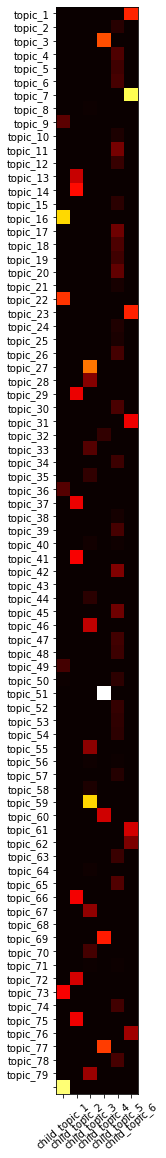

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(11,20))
heatplot = ax.imshow(psi1, cmap='hot')
ax.set_xticklabels(['child_topic_' + str(i) for i in range(80)], rotation=40)
ax.set_yticklabels(['topic_' + str(i) for i in range(80)])

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


In [46]:
psis = [psi1,]
tokens = [tokens0, tokens1,]
levels = [level0, level1]
max_level = 1
def gen_json_level(level, topic, supertopic=None, threshold=0.05, num_tokens=5):
    if level == max_level:
        return {"size": int(psis[-1].values[topic, supertopic]*10000), 
                "name": ", ".join(tokens[-1][levels[-1].topic_names[topic]][:num_tokens]).encode("utf-8")}
    json = {"name": ", ".join(tokens[level][levels[level].topic_names[topic]][:num_tokens]).encode("utf-8"),
           "children": [gen_json_level(level+1, subtopic, topic) 
                        for subtopic in range(levels[level+1].num_topics)
                        if psis[level].values[subtopic, topic] > threshold]}
    if level != 0:
        json["size"] = int(psis[level-1].values[topic, supertopic]*10000)
    return json


In [47]:
h_json = {"children": [gen_json_level(0, subtopic) for subtopic in range(level0.num_topics)]}

In [48]:
h_json

{'children': [{'name': b'query), slave->mtd, item, query, -1,',
   'children': [{'size': 2558,
     'name': b'slave->mtd, mtd_part, mtd_info, *part, part(mtd);'},
    {'size': 1648,
     'name': b'->, (0x0000), printf, output, --------------------------------------------'},
    {'size': 1330, 'name': b'-1,, opcode, ], [, -1}'},
    {'size': 3195, 'name': b'query), item, query, tag, x'}]},
  {'name': b'null);, job, jobs, kbasep_js_device_data, caller',
   'children': [{'size': 1053,
     'name': b'try, jobs, *js_devdata;, null);, address'},
    {'size': 1419,
     'name': b'flags, platform_device, virtual, dev, platform_data'},
    {'size': 1251, 'name': b'null);, ctx, kbasep_js_device_data, lock,, jobs'},
    {'size': 1250, 'name': b'job, jobs, *js_devdata;, run, *kbdev,'},
    {'size': 1327, 'name': b'null);, job, jobs, kbase_context, run'},
    {'size': 1300,
     'name': b'*js_devdata;, job, mali_bool, caller, &kbdev->js_data;'},
    {'size': 1120, 'name': b'job, null);, flags);, js